<a href="https://colab.research.google.com/github/poornass/Awesome-Vision-Attentions/blob/main/audio_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys 
sys.path.append('/content/new data')
import numpy as np
import scipy.io.wavfile as wavf
samples = np.random.randn(44100*5)
fs = 16000
out_file = 'audio.wav'
wavf.write(out_file, fs, samples)

In [3]:
import os, glob
os.makedirs('speech_waveforms',exist_ok=True)
out_dir='/content/speech_waveforms'
data_dir='/content/drive/My Drive/berlin_speech/'
os.listdir(data_dir)

['boredom', 'happy', 'disgust', 'sadness', 'neutral', 'fear', 'anger']

In [4]:
for folder in os.listdir(data_dir):
  print(os.listdir(os.path.join(data_dir,folder)))
  break

['bore(5).wav', 'bore(35).wav', 'bore(27).wav', 'bore(40).wav', 'bore(58).wav', 'bore(67).wav', 'bore(15).wav', 'bore(19).wav', 'bore(6).wav', 'bore(41).wav', 'bore(28).wav', 'bore(50).wav', 'bore(68).wav', 'bore(59).wav', 'bore(16).wav', 'bore(7).wav', 'bore(81).wav', 'bore(51).wav', 'bore(42).wav', 'bore(70).wav', 'bore(69).wav', 'bore(8).wav', 'bore(17).wav', 'bore(20).wav', 'bore(29).wav', 'bore(36).wav', 'bore(43).wav', 'bore(52).wav', 'bore(60).wav', 'bore(71).wav', 'bore(1).wav', 'bore(9).wav', 'bore(21).wav', 'bore(30).wav', 'bore(54).wav', 'bore(37).wav', 'bore(44).wav', 'bore(53).wav', 'bore(72).wav', 'bore(61).wav', 'bore(73).wav', 'bore(3).wav', 'bore(11).wav', 'bore(23).wav', 'bore(46).wav', 'bore(76).wav', 'bore(63).wav', 'bore(12).wav', 'bore(32).wav', 'bore(24).wav', 'bore(18).wav', 'bore(47).wav', 'bore(38).wav', 'bore(64).wav', 'bore(55).wav', 'bore(77).wav', 'bore(4).wav', 'bore(13).wav', 'bore(33).wav', 'bore(25).wav', 'bore(48).wav', 'bore(56).wav', 'bore(79).wav',

In [5]:
for folder in os.listdir(data_dir):
  os.makedirs(os.path.join(out_dir,folder))

In [6]:
# Get the critical imports out of the way
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile

from IPython.core.display import HTML 
# Center matplotlib figures...
HTML("""
<style>
.output_jpg {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [7]:
pip uninstall librosa

Found existing installation: librosa 0.8.1
Uninstalling librosa-0.8.1:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/librosa-0.8.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/librosa/*
Proceed (Y/n)? y
  Successfully uninstalled librosa-0.8.1


In [8]:
pip install librosa==0.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for librosa: filename=librosa-0.7.2-py3-none-any.whl size=1612903 sha256=4b8e0d5648b9dad16b9d2d6418f46cc435c5df74c6802917521163de1e329fb8
  Stored in directory: /root/.cache/pip/wheels/11/f0/b0/a8f9944f274bbc0f0159f2268f43dadcfa1cfe50a9007d8e1f
Successfully built librosa


In [9]:
#pip install librosa==0.7.2

In [10]:
#import librosa==0.6.1

In [11]:
print(librosa.__version__)

0.8.1


In [12]:
import pathlib
import os
from fastai import *
from fastai.vision import *
from scipy import signal
from scipy.io import wavfile
from fastprogress import progress_bar
import soundfile as sf


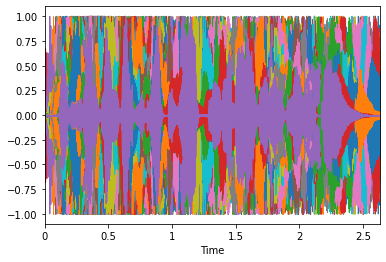

In [19]:
for folder in os.listdir(data_dir):
  i=0
  for fil in os.listdir(os.path.join(data_dir,folder)):
    dir=os.path.join(data_dir,folder,fil)
    with soundfile.SoundFile(dir) as audio:
      waveform=audio.read(dtype="float32")
      sample_rate=audio.samplerate
      librosa.display.waveplot(waveform,sr=sample_rate)
      wav_n = waveform + 0.009*np.random.normal(0,1,len(waveform))#tfms 1: Noise addition:
      wav_roll = np.roll(waveform,int(sample_rate/10))#tfms 2: Shifting Sound wave:
      factor = 0.4 #tfms 3: Time - stretching
      wav_time_stch = librosa.effects.time_stretch(waveform,factor)
      wav_pitch_sf = librosa.effects.pitch_shift(waveform,sr=sample_rate,n_steps=-5) #tfms 4: Pitch - Shifting
      sf.write(os.path.join(out_dir,folder,'noise{:04}.wav'.format(i)), wav_n, sample_rate, 'PCM_24')
      sf.write(os.path.join(out_dir,folder,'sshifting{:04}.wav'.format(i)), wav_roll, sample_rate, 'PCM_24')
      sf.write(os.path.join(out_dir,folder,'stretch{:04}.wav'.format(i)), wav_time_stch, sample_rate, 'PCM_24')
      sf.write(os.path.join(out_dir,folder,'pshift{:04}.wav'.format(i)), wav_pitch_sf, sample_rate, 'PCM_24')
      #librosa.output.write_wav(os.path.join(out_dir,folder,'noise{:04}.wav'.format(i), wav_n, sample_rate))
      i+=1

In [20]:
#@title Utility to zip and download a directory
#@markdown Use this method to zip and download a directory. For ex. a TB logs 
#@markdown directory or a checkpoint(s) directory.

from google.colab import files
import os

dir_to_zip = 'speech_waveforms' #@param {type: "string"}
output_filename = 'file.zip' #@param {type: "string"}
delete_dir_after_download = "No"  #@param ['Yes', 'No']

os.system( "zip -r {} {}".format( output_filename , dir_to_zip ) )

if delete_dir_after_download == "Yes":
    os.system( "rm -r {}".format( dir_to_zip ) )

files.download( output_filename )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>